In [ ]:
#Importing the Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTEN
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from wordcloud import WordCloud


In [ ]:
#load the dataset
data = pd.read_csv('/content/spam.csv',
                   header=0,
    encoding="latin-1",
    usecols=[0, 1],
    names=["label", "text"],)


In [ ]:
#showing the sample of dataset
data.head(20)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
#Showing the shape of dataset
print(" no of rows", len(data))
data.shape

 no of rows 5572


(5572, 2)

In [ ]:
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
#showing the lengh of the character
data['length']=data['text'].apply(len)
data.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


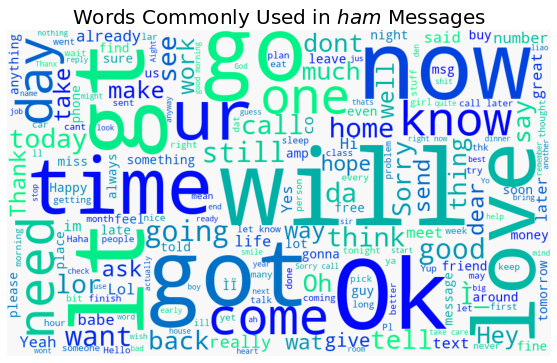

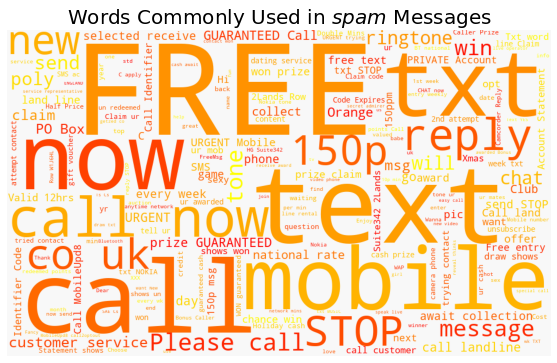

In [ ]:
#Shwoing the most common words in the dataset
for label, cmap in zip(["ham", "spam"], ["winter", "autumn"]):
    text = data.query("label == @label")["text"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)
    plt.show()

In [ ]:
#Statistical review of dataset
data["length (words)"] = data["text"].str.split().apply(len)
print(data.groupby("label").agg([min, max, "mean"]))


      length                  length (words)                
         min  max        mean            min  max       mean
label                                                       
ham        2  910   71.023627              1  171  14.200622
spam      13  224  138.866131              2   35  23.851406


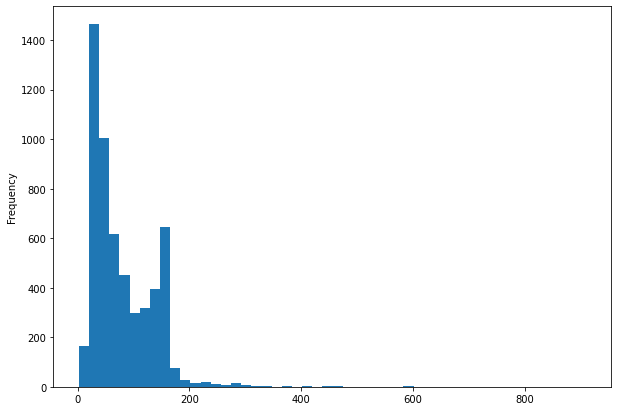

In [ ]:
#visualization of whole dataset with respect to number of character
data['length'].plot(bins=50, kind='hist',figsize=(10,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3da8899890>,
      dtype=object)

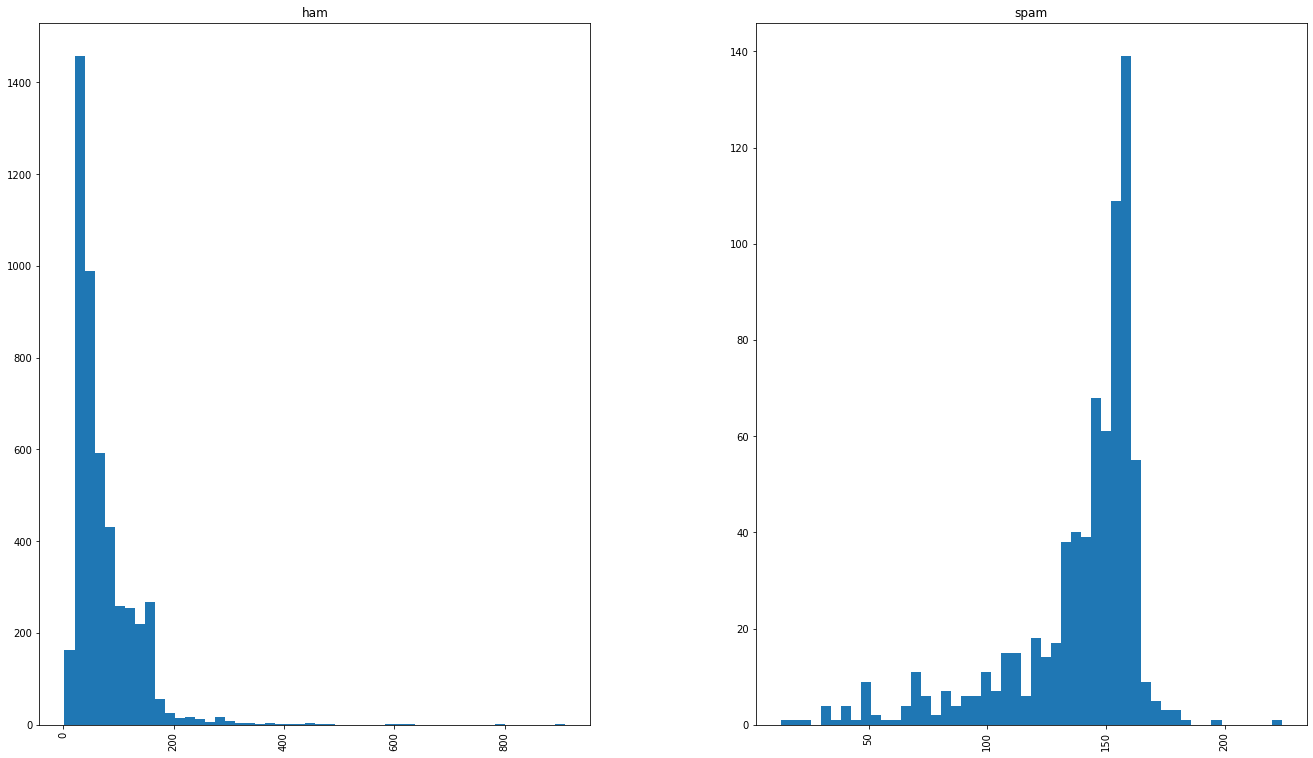

In [ ]:
#visualization of spam and ham dataset with respect to number of character
data.hist(column='length', by='label', bins=50, figsize=(22,13))

In [ ]:
#finding the null value in dataset
data.isna().sum()

label             0
text              0
length            0
length (words)    0
dtype: int64

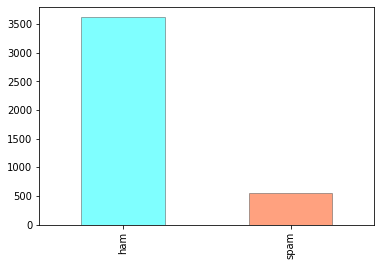

In [ ]:
#spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    data["text"], data["label"], random_state=8, stratify=data["label"]
)

_ = y_train.value_counts().plot.bar(
    color=["aqua", "orangered"], edgecolor="#555", alpha=0.5
)

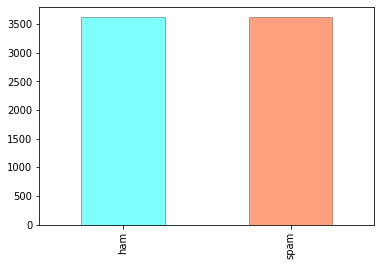

In [ ]:
#Balance the dataset using Smote function
over_sampler = SMOTEN(random_state=5)
X_train, y_train = over_sampler.fit_resample(X_train.to_frame(), y_train)
_ = y_train.value_counts().plot.bar(
    color=["aqua", "orangered"], edgecolor="#555", alpha=0.5
)

For the model evaluation, we use the bag of words(BoW) and term frequency-inverse document frequency (TF-IDF) to compare the four model.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1206
        spam       0.96      0.81      0.88       187

    accuracy                           0.97      1393
   macro avg       0.96      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393



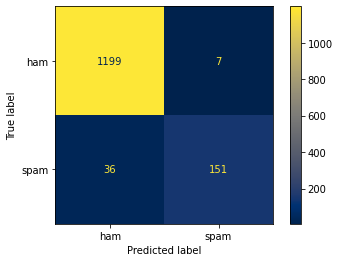

In [ ]:
#Training the dataset Using Bag of Words & Multinomial Naive Bayes model
model = make_pipeline(
    CountVectorizer(ngram_range=(1, 2), stop_words="english"), MultinomialNB()
)
model.fit(X_train["text"], y_train)
plot_confusion_matrix(model, X_test, y_test, cmap="cividis")
print(classification_report(y_test, model.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       1.00      0.85      0.92       187

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



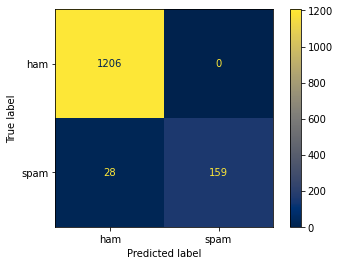

In [ ]:
#Training the dataset Using Bag of Words & Logistic Regression Model
model = make_pipeline(
    CountVectorizer(ngram_range=(1, 2), stop_words="english"), LogisticRegression()
)
model.fit(X_train["text"], y_train)
plot_confusion_matrix(model, X_test, y_test, cmap="cividis")
print(classification_report(y_test, model.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       1.00      0.87      0.93       187

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



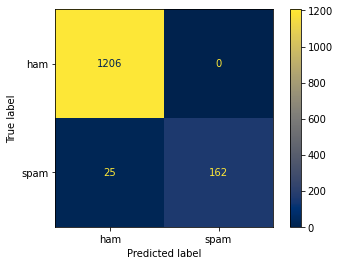

In [ ]:
#Training the dataset Using Bag of Words & Multinomial Linear Support Vector machine model
model = make_pipeline(
    CountVectorizer(ngram_range=(1, 2), stop_words="english"), svm.LinearSVC()
)
model.fit(X_train["text"], y_train)
plot_confusion_matrix(model, X_test, y_test, cmap="cividis")
print(classification_report(y_test, model.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         ham       0.98      0.99      0.98      1206
        spam       0.95      0.85      0.90       187

    accuracy                           0.97      1393
   macro avg       0.96      0.92      0.94      1393
weighted avg       0.97      0.97      0.97      1393



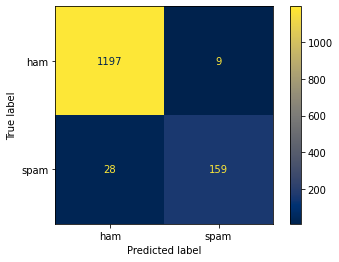

In [ ]:
#Training the dataset Using Bag of Words & Decision Tree model
model = make_pipeline(
    CountVectorizer(ngram_range=(1, 2), stop_words="english"), DecisionTreeClassifier()
)
model.fit(X_train["text"], y_train)
plot_confusion_matrix(model, X_test, y_test, cmap="cividis")
print(classification_report(y_test, model.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1206
        spam       0.97      0.74      0.84       187

    accuracy                           0.96      1393
   macro avg       0.97      0.87      0.91      1393
weighted avg       0.96      0.96      0.96      1393



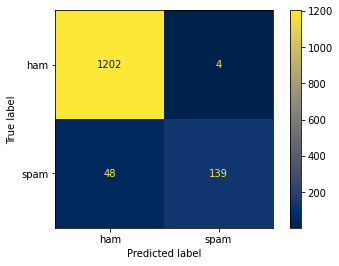

In [ ]:
# Training using TF-IDF Weighting  & Multinomial Naive Bayes model
model = make_pipeline(
    TfidfVectorizer(ngram_range=(1, 2), stop_words="english"), MultinomialNB()
)
model.fit(X_train["text"], y_train)
plot_confusion_matrix(model, X_test, y_test, cmap="cividis")
print(classification_report(y_test, model.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1206
        spam       0.98      0.66      0.79       187

    accuracy                           0.95      1393
   macro avg       0.97      0.83      0.88      1393
weighted avg       0.95      0.95      0.95      1393



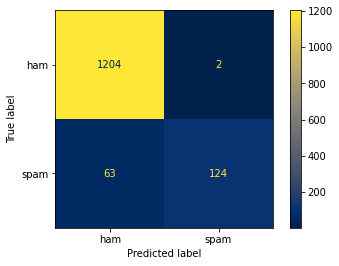

In [ ]:
# Training using TF-IDF Weighting  & LOgistic Regression Model
model = make_pipeline(
    TfidfVectorizer(ngram_range=(1, 2), stop_words="english"), LogisticRegression()
)
model.fit(X_train["text"], y_train)
plot_confusion_matrix(model, X_test, y_test, cmap="cividis")
print(classification_report(y_test, model.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       0.97      0.89      0.93       187

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



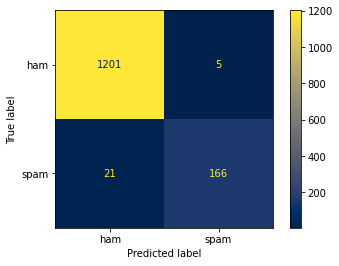

In [ ]:
# Training using TF-IDF Weighting & Linear Support Vector model
model = make_pipeline(
    TfidfVectorizer(ngram_range=(1, 2), stop_words="english"), svm.LinearSVC()
)
model.fit(X_train["text"], y_train)
plot_confusion_matrix(model, X_test, y_test, cmap="cividis")
print(classification_report(y_test, model.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1206
        spam       0.97      0.81      0.89       187

    accuracy                           0.97      1393
   macro avg       0.97      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393



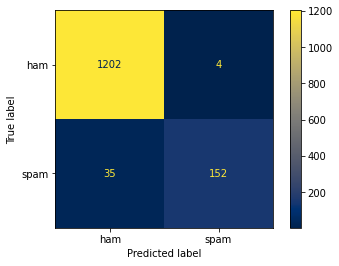

In [ ]:
# Training using TF-IDF Weighting  & Decision Tree model
model = make_pipeline(
    TfidfVectorizer(ngram_range=(1, 2), stop_words="english"), DecisionTreeClassifier()
)
model.fit(X_train["text"], y_train)
plot_confusion_matrix(model, X_test, y_test, cmap="cividis")
print(classification_report(y_test, model.predict(X_test)))